In [123]:
import pandas as pd

df = pd.read_csv('resume_generation.csv')
df.head()


,question,index,answer
0,"당신이 현재 지원한 직무에 관심을 가지게 된 계기와, 그 직무를 통해 이루고자 하는...",1,대학교에서 마케팅과 관련된 과목을 처음 접하면서 데이터 기반 마케팅이 얼마나 중요한...
1,"당신이 현재 지원한 직무에 관심을 가지게 된 계기와, 그 직무를 통해 이루고자 하는...",2,대학교 시절 처음 맡았던 팀 프로젝트에서 PM 역할을 맡게 되었습니다. 당시에는 역...
2,"당신이 현재 지원한 직무에 관심을 가지게 된 계기와, 그 직무를 통해 이루고자 하는...",3,"어릴 적부터 웹사이트와 소프트웨어에 대한 관심이 많았습니다. 특히, 웹사이트에서 사..."
3,"당신이 현재 지원한 직무에 관심을 가지게 된 계기와, 그 직무를 통해 이루고자 하는...",4,대학교에서 인사관리 과목을 수강하며 처음으로 HR에 대해 알게 되었습니다. 사람과 ...
4,"당신이 현재 지원한 직무에 관심을 가지게 된 계기와, 그 직무를 통해 이루고자 하는...",5,현대 사회에서 데이터는 기업의 성공을 결정짓는 중요한 자원이 되었습니다. 저는 대학...


In [125]:
import re
from konlpy.tag import Okt

pos_types = ['Noun', 'Verb', 'Adjective', 'Adverb']

def okt_tokenizer(text, pos_types):
    text = re.sub('[^가-힣]', ' ', text)
    result = okt.pos(text, norm=True, stem=True)
    for token, pos in result:
        if pos in pos_types: 
            yield token

In [126]:
from sklearn.feature_extraction.text import CountVectorizer

for pos_type in pos_types:
    cv = CountVectorizer(tokenizer=lambda text: list(okt_tokenizer(text, pos_type)), token_pattern=None)
    tdm = cv.fit_transform(df['answer'])
    
    df_pos = pd.DataFrame({
        'word': cv.get_feature_names_out(),
        'freq': tdm.sum(axis=0).flat
    }).sort_values(by='freq', ascending=False)
    
    variable_name = f'{pos_type.lower()}_count'
    globals()[variable_name] = df_pos

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer

for pos_type in pos_types:
    cv = TfidfVectorizer(tokenizer=lambda text: list(okt_tokenizer(text, pos_type)), token_pattern=None)
    tdm = cv.fit_transform(df['answer'])
    
    df_pos = pd.DataFrame({
        'word': cv.get_feature_names_out(),
        'freq': tdm.sum(axis=0).flat
    }).sort_values(by='freq', ascending=False)
    
    variable_name = f'{pos_type.lower()}_tfidf'
    globals()[variable_name] = df_pos

In [128]:
pos_types = ['noun', 'verb', 'adjective', 'adverb']

for pos_type in pos_types:
    globals()[pos_type] = []
    for w in globals()[f'{pos_type}_tfidf']['word'][:100]:
        globals()[pos_type].append(w)
    
    with open(f'{pos_type}_list.txt', 'w', encoding='utf-8') as f:
        for word in globals()[pos_type]:
            f.write(f"{word}\n")

In [165]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def generate_wordcloud(df, background_color='white', width=800, height=600, colormap='BuPu'):
    word_freq_dict = dict(zip(df['word'], df['freq']))
    
    wordcloud = WordCloud(
        font_path = '/Library/Fonts/PretendardVariable.ttf',
        background_color=background_color,
        width=width,
        height=height,
        colormap=colormap,
        max_words=100,
        relative_scaling=0.5,
        collocations=False,
        min_font_size=5,
        prefer_horizontal=0.7
    ).generate_from_frequencies(word_freq_dict)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

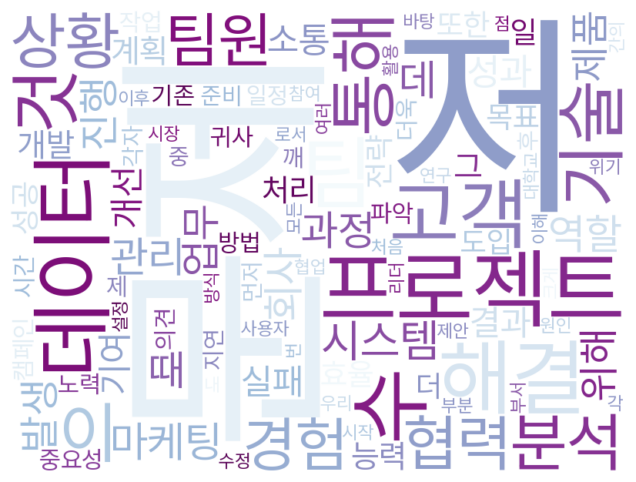

In [166]:
generate_wordcloud(noun_tfidf)

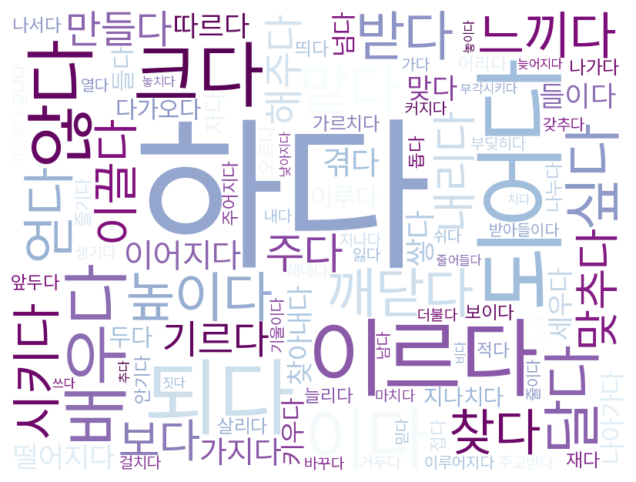

In [167]:
generate_wordcloud(verb_tfidf)

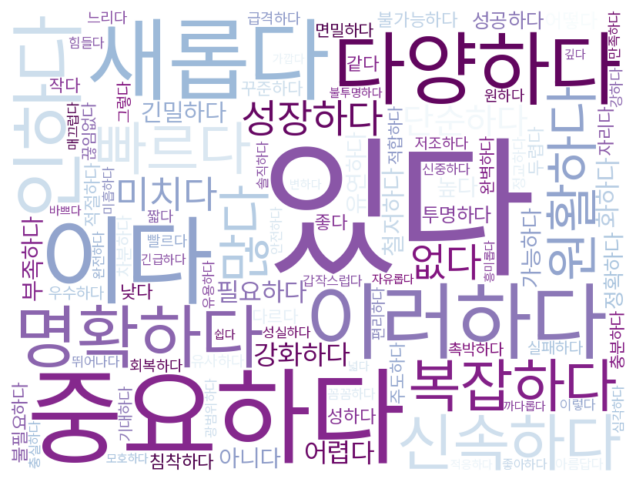

In [169]:
generate_wordcloud(adjective_tfidf)

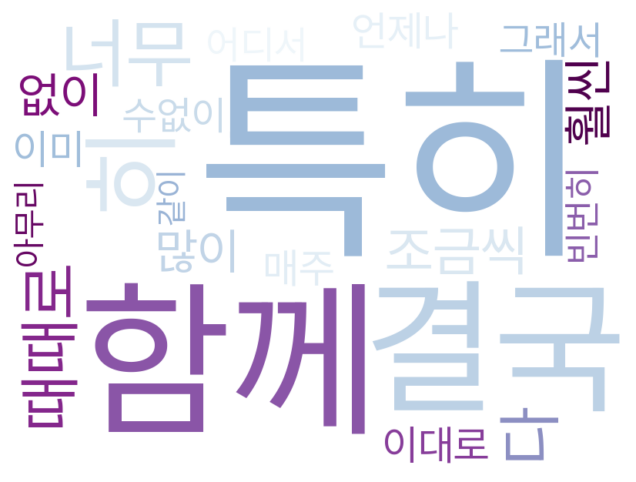

In [170]:
generate_wordcloud(adverb_tfidf)